# **Installations and Imports**

In [ ]:
!pip install pingouin

In [ ]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

# **Loading and Preprocessing of Data**

In [ ]:
# Load the dataset
df = pd.read_csv("Lung_Cancer.csv")  # Clean and preprocess the dataset#Load the dataset

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [ ]:
#Check for missing values
print(df.isnull().sum())

#Remove missing values
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [ ]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [ ]:
# Remove whitespaces from the DataFrame
df.columns = df.columns.str.strip()

#Convert '2' to '1' and '1' to '0'
new_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in new_columns:
    if col in df.columns:
        df[col] = df[col].map({2: 1, 1: 0})

# Convert 'YES' to '1' and 'NO' to '0' for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
# Binning 'AGE' and One-Hot Encoding for Binned Age
bins = [0, 30, 60, 90]
labels = ['Young', 'Middle', 'Senior']
df['AGE_BINNED'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AGE_BINNED'])

# One-Hot Encoding 'GENDER'
ohe = OneHotEncoder()
df_gender_encoded = ohe.fit_transform(df[['GENDER']]).toarray()
gender_columns = ohe.get_feature_names_out(['GENDER'])
df[gender_columns] = df_gender_encoded

# Drop the original 'GENDER' column
df = df.drop('GENDER', axis=1)

# Interaction between Gender and Smoking
df['GENDER_M_SMOKING'] = df['GENDER_M'] * df['SMOKING']

# Cumulative Risk Score
risk_factors = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']
df['CUMULATIVE_RISK'] = df[risk_factors].sum(axis=1)

# Polynomial Features for Age
df['AGE_SQUARED'] = df['AGE'] ** 2
df['AGE_CUBED'] = df['AGE'] ** 3

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,LUNG_CANCER,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED
0,69,0,1,1,0,0,1,0,1,1,...,1,False,False,True,0.0,1.0,0.0,2,4761,328509
1,74,1,0,0,0,1,1,1,0,0,...,1,False,False,True,0.0,1.0,1.0,2,5476,405224
2,59,0,0,0,1,0,1,0,1,0,...,0,False,True,False,1.0,0.0,0.0,1,3481,205379
3,63,1,1,1,0,0,0,0,0,1,...,0,False,False,True,0.0,1.0,1.0,3,3969,250047
4,63,0,1,0,0,0,0,0,1,0,...,0,False,False,True,1.0,0.0,0.0,1,3969,250047


In [ ]:
# Transform columns with booleans to numerical values
df['AGE_BINNED_Young'] = df['AGE_BINNED_Young'].astype(int)
df['AGE_BINNED_Middle'] = df['AGE_BINNED_Middle'].astype(int)
df['AGE_BINNED_Senior'] = df['AGE_BINNED_Senior'].astype(int)

df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,LUNG_CANCER,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED
0,69,0,1,1,0,0,1,0,1,1,...,1,0,0,1,0.0,1.0,0.0,2,4761,328509
1,74,1,0,0,0,1,1,1,0,0,...,1,0,0,1,0.0,1.0,1.0,2,5476,405224
2,59,0,0,0,1,0,1,0,1,0,...,0,0,1,0,1.0,0.0,0.0,1,3481,205379
3,63,1,1,1,0,0,0,0,0,1,...,0,0,0,1,0.0,1.0,1.0,3,3969,250047
4,63,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1.0,0.0,0.0,1,3969,250047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,...,1,0,1,0,1.0,0.0,0.0,2,3136,175616
305,70,1,0,0,0,0,1,1,1,1,...,1,0,0,1,0.0,1.0,1.0,1,4900,343000
306,58,1,0,0,0,0,0,1,1,1,...,1,0,1,0,0.0,1.0,1.0,1,3364,195112
307,67,1,0,1,0,0,1,1,0,1,...,1,0,0,1,0.0,1.0,1.0,2,4489,300763


# **Univariate Analysis**

In [ ]:
# Create a DataFrame to hold the statistics
statistics = pd.DataFrame()

# Hold the features in a list
# Find the number of features
features = df.columns.tolist()
num_features = len(features)

# Generate DataFrames for each statistic
means_df = np.mean(df, axis=0)
medians_df = df.median()
modes_df = df.mode().iloc[0]
stds_df = df.std()
variances_df = df.var()
mins_df = df.min()
maxs_df = df.max()
skewness_df = df.skew()
kurtosis_df = df.kurt()

# Convert the statistical values in the DataFrames to lists
means = [means_df.iloc[i] for i in range(num_features)]
medians = [medians_df.iloc[i] for i in range(num_features)]
modes = [modes_df.iloc[i] for i in range(num_features)]
stds = [stds_df.iloc[i] for i in range(num_features)]
variances = [variances_df.iloc[i] for i in range(num_features)]
mins = [mins_df.iloc[i] for i in range(num_features)]
maxs = [maxs_df.iloc[i] for i in range(num_features)]
skew_vals = [skewness_df.iloc[i] for i in range(num_features)]
kurtosis_vals = [kurtosis_df.iloc[i] for i in range(num_features)]

# Add the statistical values to the statistics DataFrame
statistics['Features'] = features
statistics['Means'] = means
statistics['Medians'] = medians
statistics['Modes'] = modes
statistics['Standard Deviations'] = stds
statistics['Variances'] = variances
statistics['Minimum Values'] = mins
statistics['Maximum Values'] = maxs
statistics['Skew Values'] = skew_vals
statistics['Kurtosis Values'] = kurtosis_vals

# Print out the statistics DataFrame
statistics

,Features,Means,Medians,Modes,Standard Deviations,Variances,Minimum Values,Maximum Values,Skew Values,Kurtosis Values
0,AGE,62.673139,62.0,64.0,8.210301,6.740905e+01,21.0,87.0,-0.395086,1.746558
1,SMOKING,0.563107,1.0,1.0,0.496806,2.468163e-01,0.0,1.0,-0.255705,-1.947261
2,YELLOW_FINGERS,0.569579,1.0,1.0,0.495938,2.459547e-01,0.0,1.0,-0.282425,-1.932789
3,ANXIETY,0.498382,0.0,0.0,0.500808,2.508091e-01,0.0,1.0,0.006504,-2.013029
4,PEER_PRESSURE,0.501618,1.0,1.0,0.500808,2.508091e-01,0.0,1.0,-0.006504,-2.013029
5,CHRONIC DISEASE,0.504854,1.0,1.0,0.500787,2.507880e-01,0.0,1.0,-0.019513,-2.012689
6,FATIGUE,0.673139,1.0,1.0,0.469827,2.207372e-01,0.0,1.0,-0.741836,-1.459167
7,ALLERGY,0.556634,1.0,1.0,0.497588,2.475938e-01,0.0,1.0,-0.229118,-1.960235
8,WHEEZING,0.556634,1.0,1.0,0.497588,2.475938e-01,0.0,1.0,-0.229118,-1.960235
9,ALCOHOL CONSUMING,0.556634,1.0,1.0,0.497588,2.475938e-01,0.0,1.0,-0.229118,-1.960235


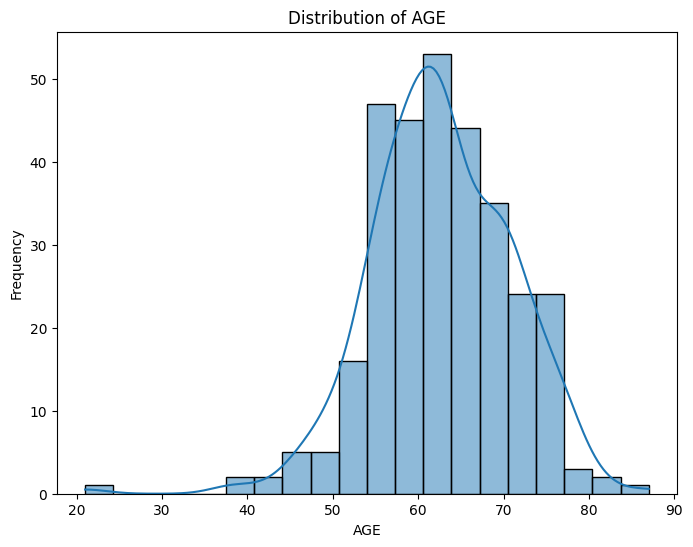

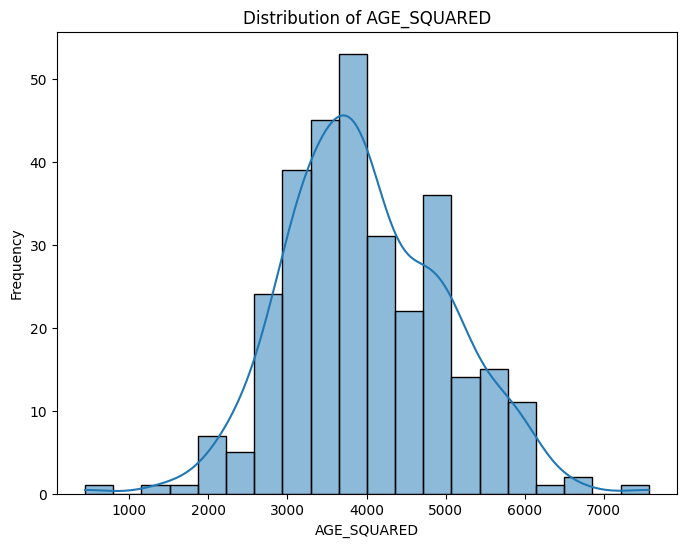

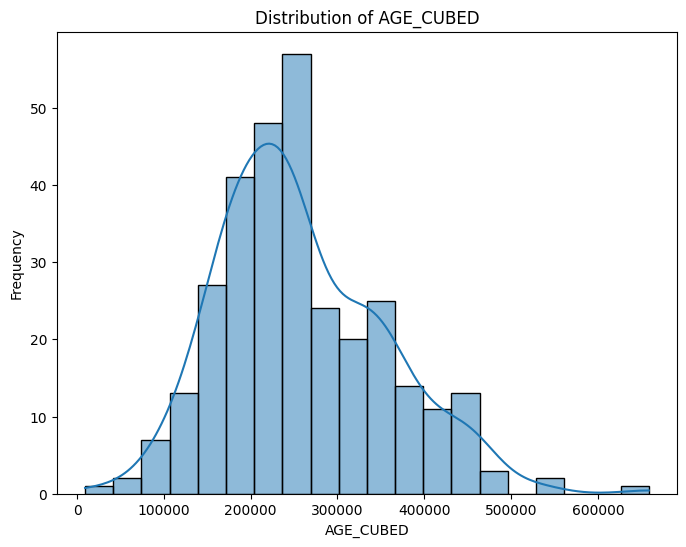

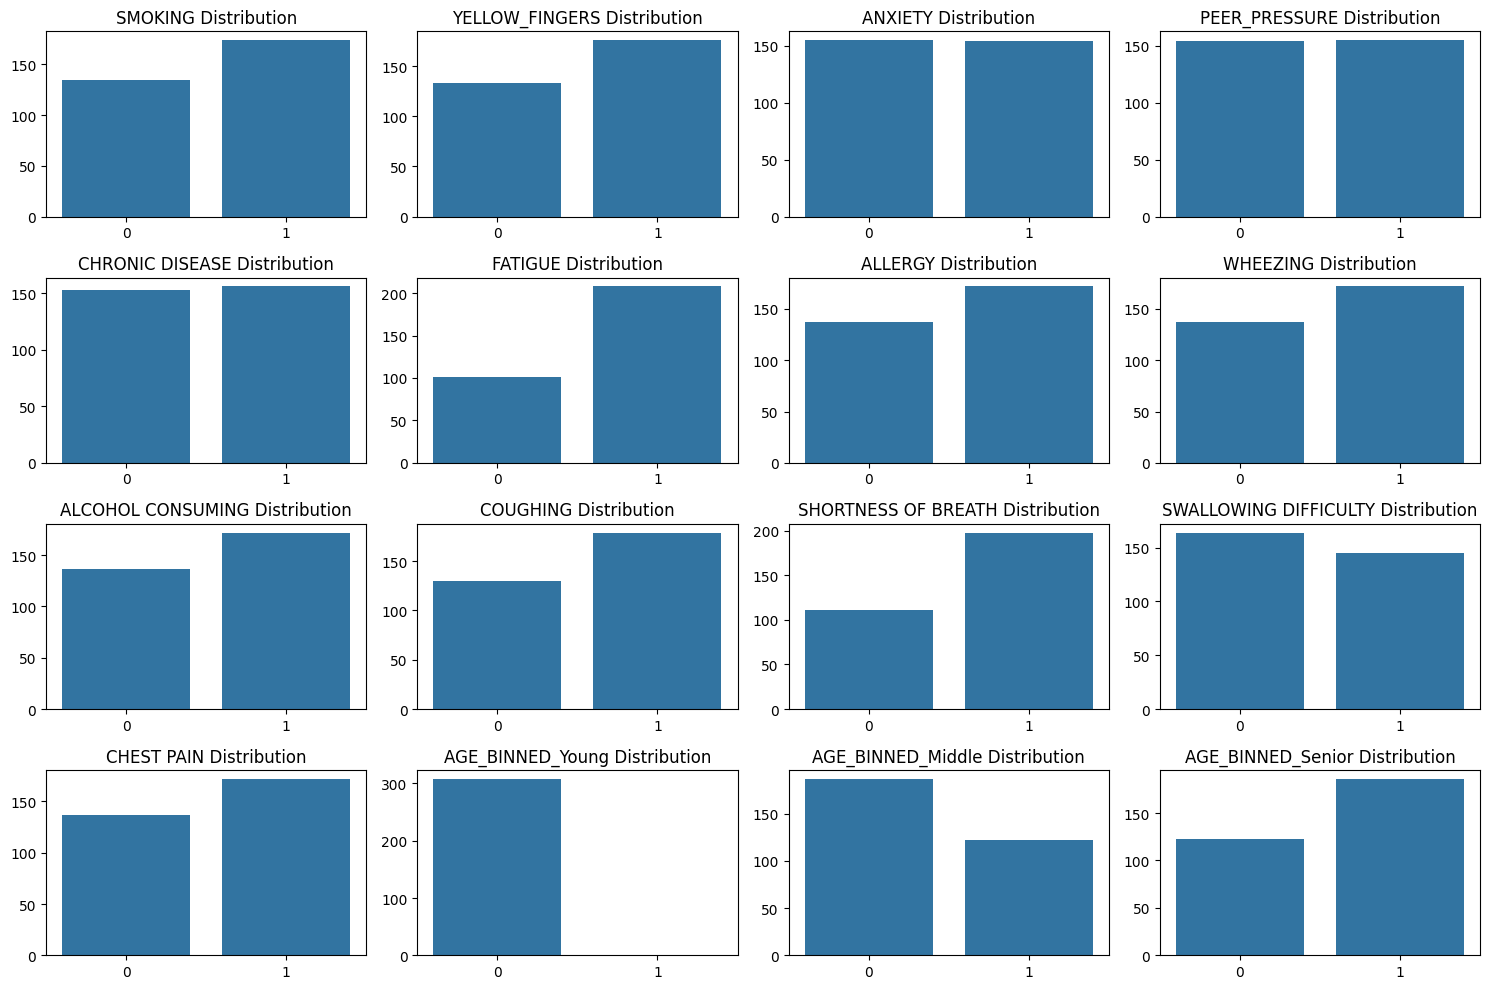

In [ ]:
# Remove any leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

# Visualize the distribution of numerical features using bar chart w/curve
numerical_columns = ['AGE', 'AGE_SQUARED', 'AGE_CUBED']  # Add more columns if needed

# Loop through the columns and plot the histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)  # Add kde=True to show the curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the binary features using bar charts
binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                  'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'AGE_BINNED_Young',
                  'AGE_BINNED_Middle', 'AGE_BINNED_Senior']
plt.figure(figsize=(15, 10))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# Obtain the class counts for each category to evaluate if there is imbalance
for column in df.columns:
  print(df[column].value_counts())
  print()

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

SMOKING
1    174
0    135
Name: count, dtype: int64

YELLOW_FINGERS
1    176
0    133
Name: count, dtype: int64

ANXIETY
0    155
1    154
Name: count, dtype: int64

PEER_PRESSURE
1    155
0    154
Name: count, dtype: int64

CHRONIC DISEASE
1    156
0    153
Name: count, dtype: int64

FATIGUE
1    208
0    101
Name: count, dtype: int64

ALLERGY
1    172
0    137
Name: count, dtype: int64

WHEEZING
1    172
0    137
Name: count, dtype: int64

ALCOHOL CONSUMING
1    172
0    137
Name: count, dtype: int64

COUGHING
1    179
0    130
Name: count, dtype: int64

SHORTNESS OF BREATH
1    198
0    111
Name: count, dtyp

# **Correlation Analysis**

In [ ]:
# Splitting the Dataset
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

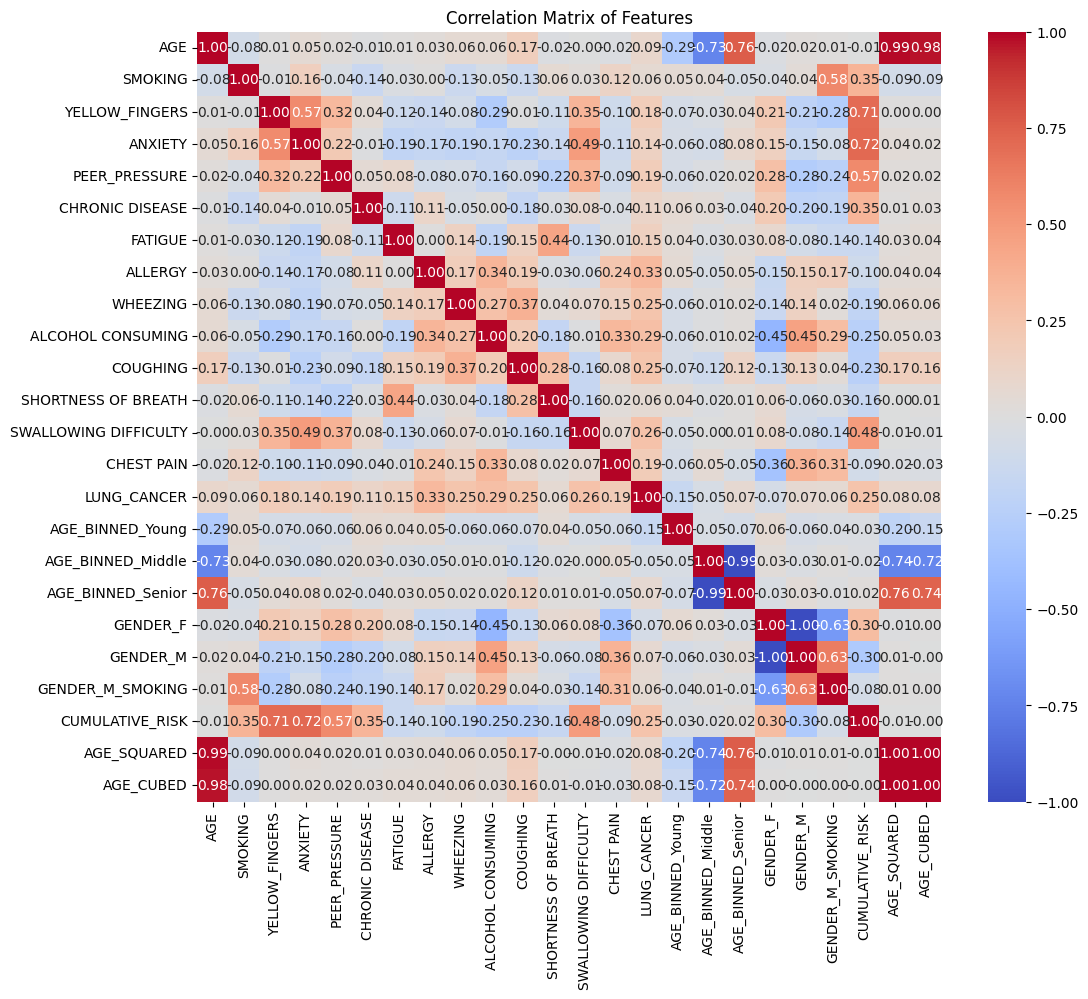

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

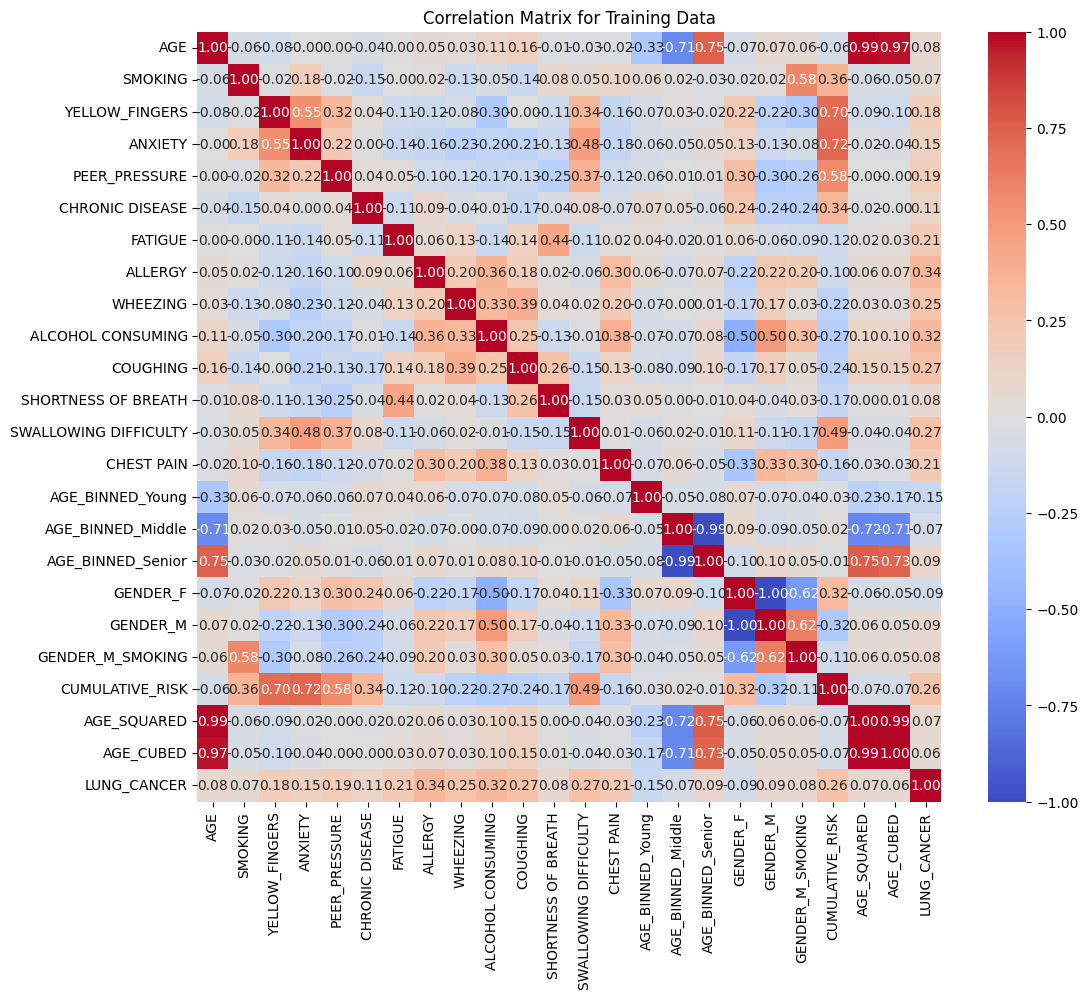


Correlation of each feature with LUNG_CANCER:
 LUNG_CANCER              1.000000
ALLERGY                  0.335991
ALCOHOL CONSUMING        0.320463
SWALLOWING DIFFICULTY    0.272262
COUGHING                 0.266227
CUMULATIVE_RISK          0.258831
WHEEZING                 0.252148
CHEST PAIN               0.206604
FATIGUE                  0.205063
PEER_PRESSURE            0.187774
YELLOW_FINGERS           0.183833
ANXIETY                  0.151626
CHRONIC DISEASE          0.109569
AGE_BINNED_Senior        0.089312
GENDER_M                 0.085816
AGE                      0.084629
GENDER_M_SMOKING         0.083194
SHORTNESS OF BREATH      0.081827
AGE_SQUARED              0.072615
SMOKING                  0.068035
AGE_CUBED                0.064028
AGE_BINNED_Middle       -0.069802
GENDER_F                -0.085816
AGE_BINNED_Young        -0.151894
Name: LUNG_CANCER, dtype: float64

Highly correlated feature pairs (absolute correlation > 0.7):
 AGE_SQUARED        AGE_CUBED          

In [ ]:
# Merge 'LUNG_CANCER' back into X_train temporarily for correlation analysis with the target
X_train_with_target = X_train.copy()
X_train_with_target['LUNG_CANCER'] = y_train

# Step 1: Calculate the correlation matrix
correlation_matrix = X_train_with_target.corr()

# Step 2: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Training Data")
plt.show()

# Step 3: Analyze correlations
# Extract correlations of each feature with 'LUNG_CANCER'
lung_cancer_corr = correlation_matrix['LUNG_CANCER'].sort_values(ascending=False)
print("\nCorrelation of each feature with LUNG_CANCER:\n", lung_cancer_corr)

# Optional: Identify highly correlated features within X_train
# Select pairs with absolute correlation above a certain threshold (e.g., 0.7)
threshold = 0.7
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Exclude self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("\nHighly correlated feature pairs (absolute correlation > 0.7):\n", high_corr_pairs)

In [ ]:
# Calculate partial correlations with 'LUNG_CANCER' while controlling for all other features
partial_corr = pg.partial_corr(data=X_train_with_target, x='LUNG_CANCER', y=X_train.columns.tolist(), covar=X_train.columns.difference(['LUNG_CANCER']).tolist())
print("\nPartial Correlations with LUNG_CANCER:\n", partial_corr)


Partial Correlations with LUNG_CANCER:
            n         r          CI95%     p-val
pearson  247 -0.046615  [-0.18, 0.09]  0.510046


In [ ]:
# Calculate point-biserial correlations between binary features and LUNG_CANCER
binary_features = X_train.columns  # Replace with binary features only if needed
biserial_corrs = {feature: pointbiserialr(X_train_with_target[feature], y_train)[0] for feature in binary_features}

print("\nPoint-Biserial Correlations with LUNG_CANCER:\n", biserial_corrs)


Point-Biserial Correlations with LUNG_CANCER:
 {'AGE': 0.08462929719977395, 'SMOKING': 0.06803456993425687, 'YELLOW_FINGERS': 0.18383280912708053, 'ANXIETY': 0.1516262127293482, 'PEER_PRESSURE': 0.18777400104623512, 'CHRONIC DISEASE': 0.10956889466272621, 'FATIGUE': 0.2050625081893761, 'ALLERGY': 0.33599086371292314, 'WHEEZING': 0.25214780991101565, 'ALCOHOL CONSUMING': 0.32046281069495064, 'COUGHING': 0.26622685186403666, 'SHORTNESS OF BREATH': 0.0818273510038963, 'SWALLOWING DIFFICULTY': 0.27226205058149583, 'CHEST PAIN': 0.2066044760550589, 'AGE_BINNED_Young': -0.1518942143076723, 'AGE_BINNED_Middle': -0.06980228677991988, 'AGE_BINNED_Senior': 0.08931209321712491, 'GENDER_F': -0.0858162469116044, 'GENDER_M': 0.0858162469116044, 'GENDER_M_SMOKING': 0.08319379136213782, 'CUMULATIVE_RISK': 0.2588307145746222, 'AGE_SQUARED': 0.0726151219859657, 'AGE_CUBED': 0.06402833497590425}


In [ ]:
# Train a Random Forest and get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:\n", feature_importances)


Feature Importances from Random Forest:
                   Feature  Importance
20        CUMULATIVE_RISK    0.102425
9       ALCOHOL CONSUMING    0.088753
21            AGE_SQUARED    0.083556
0                     AGE    0.072708
22              AGE_CUBED    0.072471
7                 ALLERGY    0.067016
2          YELLOW_FINGERS    0.049845
4           PEER_PRESSURE    0.048533
10               COUGHING    0.046163
6                 FATIGUE    0.045606
12  SWALLOWING DIFFICULTY    0.043163
13             CHEST PAIN    0.040375
5         CHRONIC DISEASE    0.039181
8                WHEEZING    0.037987
11    SHORTNESS OF BREATH    0.031317
3                 ANXIETY    0.022642
18               GENDER_M    0.020456
1                 SMOKING    0.019060
19       GENDER_M_SMOKING    0.018882
17               GENDER_F    0.016797
15      AGE_BINNED_Middle    0.014720
16      AGE_BINNED_Senior    0.014579
14       AGE_BINNED_Young    0.003765


In [ ]:
# Drop highly correlated features from the DataFrame
df = df.drop(columns=['AGE_BINNED_Middle', 'GENDER_F', 'AGE_BINNED_Young', 'AGE_CUBED', 'YELLOW_FINGERS'])
df

,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_BINNED_Senior,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED
0,69,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1.0,0.0,2,4761
1,74,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1.0,1.0,2,5476
2,59,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0.0,0.0,1,3481
3,63,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1.0,1.0,3,3969
4,63,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0.0,0.0,1,3969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,1,1,1,0,0,1,1,1,1,0,1,0,0.0,0.0,2,3136
305,70,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1.0,1.0,1,4900
306,58,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1.0,1.0,1,3364
307,67,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1.0,1.0,2,4489


In [ ]:
# Split the data again
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Calculate VIF for each feature in X_train
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Variance Inflation Factor (VIF) for each feature:
                   feature         VIF
0                     AGE  171.987258
1                 SMOKING   11.360322
2                 ANXIETY   11.111783
3           PEER_PRESSURE    8.130901
4         CHRONIC DISEASE    6.246868
5                 FATIGUE    4.981640
6                 ALLERGY    2.743322
7                WHEEZING    3.052355
8       ALCOHOL CONSUMING    4.198946
9                COUGHING    3.640862
10    SHORTNESS OF BREATH    4.455911
11  SWALLOWING DIFFICULTY    2.823111
12             CHEST PAIN    2.907671
13      AGE_BINNED_Senior    5.692275
14               GENDER_M    6.257792
15       GENDER_M_SMOKING    6.057822
16        CUMULATIVE_RISK   65.245102
17            AGE_SQUARED  151.708099


In [ ]:
# Drop highly correlated features from the DataFrame
df = df.drop(columns=['AGE', 'AGE_SQUARED', 'CUMULATIVE_RISK'])
df

,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_BINNED_Senior,GENDER_M,GENDER_M_SMOKING
0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1.0,0.0
1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1.0,1.0
2,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0.0,0.0
3,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1.0,1.0
4,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,1,1,1,0,0,1,1,1,1,0,1,0,0.0,0.0
305,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1.0,1.0
306,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1.0,1.0
307,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1.0,1.0


In [ ]:
# Split the data again
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Building Models**

## **Logistic Regression**

In [ ]:
# Create and fit Logistic Regression model on the training dataset with liblinear solver
lr_model = LogisticRegression(solver='liblinear', max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

# Run the Logistic Regression model on the testing dataset
y_pred_test = lr_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')
print(f'Validation Mean Absolute Error: {mae:.3f}')
print(f'Validation Mean Squared Error: {mse:.3f}')
print(f'Validation Mean R-Squared: {r2:.3f}')

Validation Accuracy: 0.968
Validation Precision: 0.983
Validation Recall: 0.983
Validation F1: 0.983
Validation Mean Absolute Error: 0.032
Validation Mean Squared Error: 0.032
Validation Mean R-Squared: -0.033


## **Singular Vector Machine**




In [ ]:
# Create and fit SVM model on the training dataset
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Run the SVM model on the testing dataset
y_test = svm_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')
print(f'Validation Mean Absolute Error: {mae:.3f}')
print(f'Validation Mean Squared Error: {mse:.3f}')
print(f'Validation Mean R-Squared: {r2:.3f}')

Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000


## **Random Forest**

In [ ]:
# Create and fit Random Forest model on the training dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Run the Random Forest model on the testing dataset
y_pred_test = rf_model.predict(X_test)

# Calculate the metrics on the testing dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the metrics for the testing dataset
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')
print(f'Validation Mean Absolute Error: {mae:.3f}')
print(f'Validation Mean Squared Error: {mse:.3f}')
print(f'Validation Mean R-Squared: {r2:.3f}')

Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000


# **Cross-Validation**

In [ ]:
# Step 1: Define the scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Step 2: Initialize the models
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Perform cross-validation for Logistic Regression
print("Cross-validation results for Logistic Regression:")
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring=scorer)
    print(f'{metric_name.capitalize()}: Mean={np.mean(scores):.3f}, Std={np.std(scores):.3f}')

print("\n")

# Step 3: Perform cross-validation for SVM
print("Cross-validation results for SVM:")
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=scorer)
    print(f'{metric_name.capitalize()}: Mean={np.mean(scores):.3f}, Std={np.std(scores):.3f}')

print("\n")

# Step 4: Perform cross-validation for Random Forest
print("Cross-validation results for Random Forest:")
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=scorer)
    print(f'{metric_name.capitalize()}: Mean={np.mean(scores):.3f}, Std={np.std(scores):.3f}')

Cross-validation results for Logistic Regression:
Accuracy: Mean=0.895, Std=0.019
Precision: Mean=0.915, Std=0.015
Recall: Mean=0.967, Std=0.024
F1: Mean=0.940, Std=0.012
Mae: Mean=0.105, Std=0.019
Mse: Mean=0.105, Std=0.019
R2: Mean=0.176, Std=0.125


Cross-validation results for SVM:
Accuracy: Mean=0.895, Std=0.032
Precision: Mean=0.930, Std=0.015
Recall: Mean=0.948, Std=0.028
F1: Mean=0.939, Std=0.019
Mae: Mean=0.105, Std=0.032
Mse: Mean=0.105, Std=0.032
R2: Mean=0.176, Std=0.231


Cross-validation results for Random Forest:
Accuracy: Mean=0.899, Std=0.038
Precision: Mean=0.931, Std=0.022
Recall: Mean=0.952, Std=0.045
F1: Mean=0.941, Std=0.024
Mae: Mean=0.101, Std=0.038
Mse: Mean=0.101, Std=0.038
R2: Mean=0.202, Std=0.286


# **Grid Search Cross-Validation**

## **Logistic Regression**

In [ ]:
# Step 1: Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg', 'newton-cholesky', 'sag']
}

# Step 2: Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=10000, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

# Step 3: Fit the model using grid search on the training dataset
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and the best model
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

# Step 5: Run the best model on the validation dataset
y_pred_test = best_lr_model.predict(X_test)

# Step 6: Calculate the metrics on the validation dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Step 7: Print the best parameters and metrics for the validation dataset
print(f'Best Parameters: {best_params}')
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')
print(f'Validation Mean Absolute Error: {mae:.3f}')
print(f'Validation Mean Squared Error: {mse:.3f}')
print(f'Validation Mean R-Squared: {r2:.3f}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000


## **Singular-Vector Machine**

In [ ]:
# Step 1: Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Step 2: Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 5-fold cross-validation
    verbose=1
)

# Step 3: Fit the model using grid search on the training dataset
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and the best model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Step 5: Run the best model on the validation dataset
y_pred_test = best_svm_model.predict(X_test)

# Step 6: Calculate the metrics on the validation dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Step 7: Print the best parameters and metrics for the validation dataset
print(f'Best Parameters: {best_params}')
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')
print(f'Validation Mean Absolute Error: {mae:.3f}')
print(f'Validation Mean Squared Error: {mse:.3f}')
print(f'Validation Mean R-Squared: {r2:.3f}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000


## **Random Forest**

In [ ]:
# Step 1: Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Step 2: Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Step 3: Fit the model using grid search on the training dataset
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Step 5: Run the best model on the validation dataset
y_pred_test = best_rf_model.predict(X_test)

# Step 6: Calculate the metrics on the validation dataset
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Step 7: Print the best parameters and metrics for the validation dataset
print(f'Best Parameters: {best_params}')
print(f'Validation Accuracy: {accuracy:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall: {recall:.3f}')
print(f'Validation F1: {f1:.3f}')
print(f'Validation Mean Absolute Error: {mae:.3f}')
print(f'Validation Mean Squared Error: {mse:.3f}')
print(f'Validation Mean R-Squared: {r2:.3f}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000


# **Model Evaluation**

Logistic Regression - Class Distribution in y_test: {1: 60, 0: 2}
Logistic Regression - Class Distribution in y_pred: {1: 60, 0: 2}
Logistic Regression Metrics:
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000
----------------------------------------


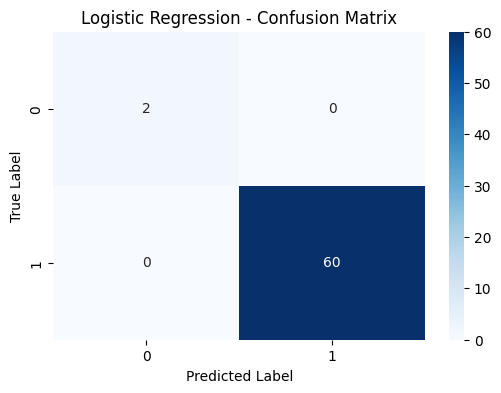

SVM - Class Distribution in y_test: {1: 60, 0: 2}
SVM - Class Distribution in y_pred: {1: 60, 0: 2}
SVM Metrics:
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000
----------------------------------------


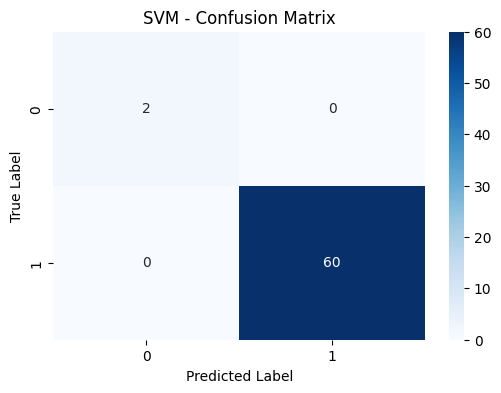

Random Forest - Class Distribution in y_test: {1: 60, 0: 2}
Random Forest - Class Distribution in y_pred: {1: 60, 0: 2}
Random Forest Metrics:
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1: 1.000
Validation Mean Absolute Error: 0.000
Validation Mean Squared Error: 0.000
Validation Mean R-Squared: 1.000
----------------------------------------


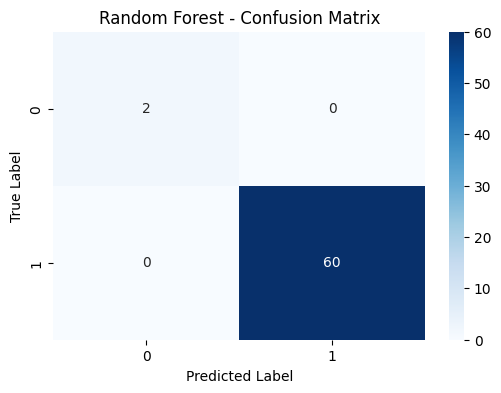

In [ ]:
# Define models
models = {
    "Logistic Regression": best_lr_model,
    "SVM": best_svm_model,
    "Random Forest": best_rf_model
}

# Include known labels in the confusion matrix
known_labels = [0, 1]  # Adjust based on your dataset

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation dataset
    y_pred = model.predict(X_test)

    # Check class distribution in predictions and true labels
    print(f"{name} - Class Distribution in y_test: {pd.Series(y_test).value_counts().to_dict()}")
    print(f"{name} - Class Distribution in y_pred: {pd.Series(y_pred).value_counts().to_dict()}")

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Validation Accuracy: {accuracy:.3f}")
    print(f"Validation Precision: {precision:.3f}")
    print(f"Validation Recall: {recall:.3f}")
    print(f"Validation F1: {f1:.3f}")
    print(f'Validation Mean Absolute Error: {mae:.3f}')
    print(f'Validation Mean Squared Error: {mse:.3f}')
    print(f'Validation Mean R-Squared: {r2:.3f}')
    print("-" * 40)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=known_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=known_labels, yticklabels=known_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# **Feature Importance**

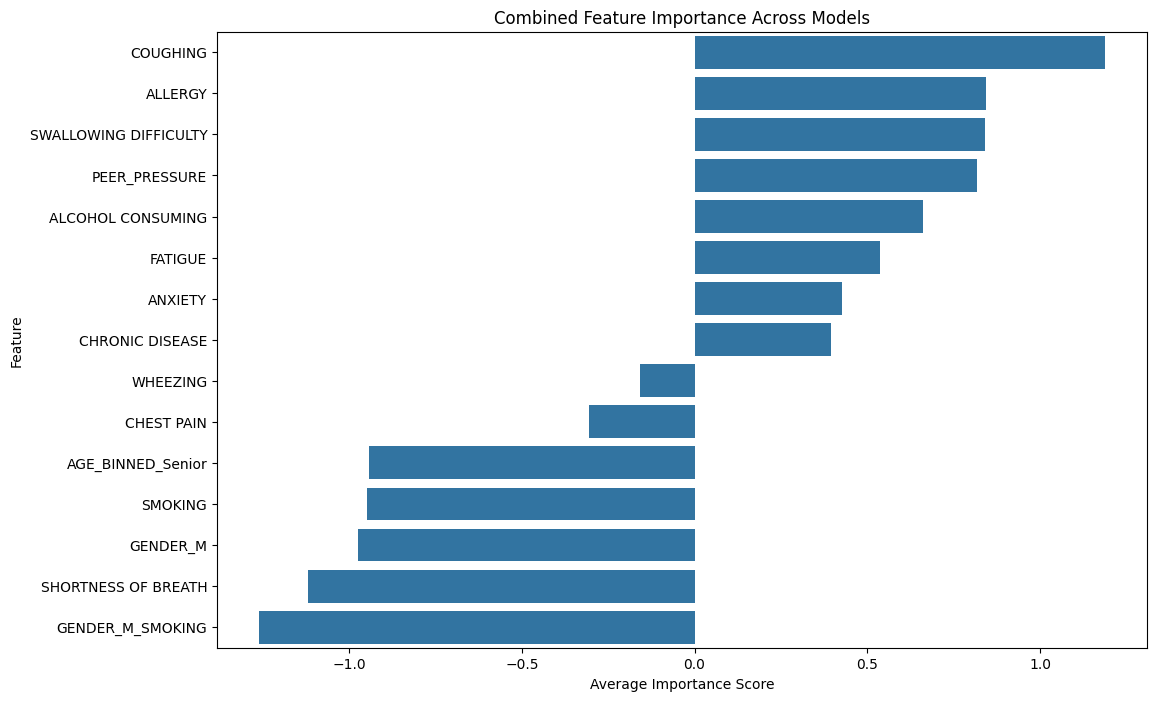

In [ ]:
# Logistic Regression Feature Importance
lr_coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(best_lr_model.coef_[0])}).sort_values(by='Coefficient', ascending=False)

# SVM Feature Importance
svm_weights = pd.DataFrame({'Feature': X.columns, 'Weight': np.abs(best_svm_model.coef_[0])}).sort_values(by='Weight', ascending=False)

# Random Forest Feature Importances
rf_importances = (pd.DataFrame({'Feature': X.columns, 'Importance': best_rf_model.feature_importances_}).sort_values(by='Importance', ascending=False))

# Combine Results
combined_importance = (lr_coeffs .rename(columns={'Coefficient': 'Logistic_Coeff'}).merge(svm_weights.rename(columns={'Weight': 'SVM_Weight'}), on='Feature')
                       .merge(rf_importances.rename(columns={'Importance': 'RF_Importance'}), on='Feature'))

# Normalize and Average Importance
scaler = StandardScaler()
combined_importance[['Logistic_Coeff', 'SVM_Weight', 'RF_Importance']] = scaler.fit_transform(
                                                                        combined_importance[['Logistic_Coeff', 'SVM_Weight', 'RF_Importance']])
combined_importance['Average_Importance'] = combined_importance[['Logistic_Coeff', 'SVM_Weight', 'RF_Importance']].mean(axis=1)

# Sort by Average Importance
combined_importance = combined_importance.sort_values(by='Average_Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Importance', y='Feature', data=combined_importance)
plt.title('Combined Feature Importance Across Models')
plt.xlabel('Average Importance Score')
plt.ylabel('Feature')
plt.show()

# **Determining the Best Model**

## **t-Statistic Applied on Score Before Cross Validations**

In [ ]:
# Scores provided (mean values before cross-validation)
log_reg_scores = {"accuracy": 0.968, "precision": 0.983, "recall": 0.983, "f1": 0.983, "mae": 0.032, "mse": 0.032, "r2": -0.033}
svm_scores = {"accuracy": 1.000, "precision": 1.000, "recall": 1.000, "f1": 1.000, "mae": 0.000, "mse": 0.000, "r2": 1.000}
rf_scores = {"accuracy": 1.000, "precision": 1.000, "recall": 1.000, "f1": 1.000, "mae": 0.000, "mse": 0.000, "r2": 1.000}

# Simulate individual scores for t-test (mean ± assumed std)
np.random.seed(42)
simulated_log_reg = {metric: np.random.normal(mean, 0.005, 10) for metric, mean in log_reg_scores.items()}
simulated_svm = {metric: np.random.normal(mean, 0.005, 10) for metric, mean in svm_scores.items()}
simulated_rf = {metric: np.random.normal(mean, 0.005, 10) for metric, mean in rf_scores.items()}

# Perform paired t-tests
metrics = ["accuracy", "precision", "recall", "f1", "mae", "mse", "r2"]

print("T-Test Results (Without Cross-Validation):\n")
for metric in metrics:
    # Perform t-tests for each pair of models
    t_stat_lr_svm, p_val_lr_svm = ttest_rel(simulated_log_reg[metric], simulated_svm[metric])
    t_stat_lr_rf, p_val_lr_rf = ttest_rel(simulated_log_reg[metric], simulated_rf[metric])
    t_stat_svm_rf, p_val_svm_rf = ttest_rel(simulated_svm[metric], simulated_rf[metric])

    # Print results for each metric
    print(f"Metric: {metric.capitalize()}")
    print(f"  - Logistic Regression vs SVM:")
    print(f"      t-statistic = {t_stat_lr_svm:.3f}, p-value = {p_val_lr_svm:.3f}")
    if p_val_lr_svm < 0.05:
        print(f"      -> Significant difference: Logistic Regression and SVM differ in {metric}.\n")
    else:
        print(f"      -> No significant difference in {metric}.\n")

    print(f"  - Logistic Regression vs Random Forest:")
    print(f"      t-statistic = {t_stat_lr_rf:.3f}, p-value = {p_val_lr_rf:.3f}")
    if p_val_lr_rf < 0.05:
        print(f"      -> Significant difference: Logistic Regression and Random Forest differ in {metric}.\n")
    else:
        print(f"      -> No significant difference in {metric}.\n")

    print(f"  - SVM vs Random Forest:")
    print(f"      t-statistic = {t_stat_svm_rf:.3f}, p-value = {p_val_svm_rf:.3f}")
    if p_val_svm_rf < 0.05:
        print(f"      -> Significant difference: SVM and Random Forest differ in {metric}.\n")
    else:
        print(f"      -> No significant difference in {metric}.\n")

T-Test Results (Without Cross-Validation):

Metric: Accuracy
  - Logistic Regression vs SVM:
      t-statistic = -13.304, p-value = 0.000
      -> Significant difference: Logistic Regression and SVM differ in accuracy.

  - Logistic Regression vs Random Forest:
      t-statistic = -12.177, p-value = 0.000
      -> Significant difference: Logistic Regression and Random Forest differ in accuracy.

  - SVM vs Random Forest:
      t-statistic = 0.022, p-value = 0.983
      -> No significant difference in accuracy.

Metric: Precision
  - Logistic Regression vs SVM:
      t-statistic = -18.854, p-value = 0.000
      -> Significant difference: Logistic Regression and SVM differ in precision.

  - Logistic Regression vs Random Forest:
      t-statistic = -10.830, p-value = 0.000
      -> Significant difference: Logistic Regression and Random Forest differ in precision.

  - SVM vs Random Forest:
      t-statistic = -0.173, p-value = 0.866
      -> No significant difference in precision.

Metri